In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
A=pd.read_csv('Advertising-1.csv',index_col=0)

#B=A[['Sales','TV','Radio']]

In [3]:
A.shape

(200, 4)

In [7]:
A.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [33]:
A.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


/usr/local/anaconda/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


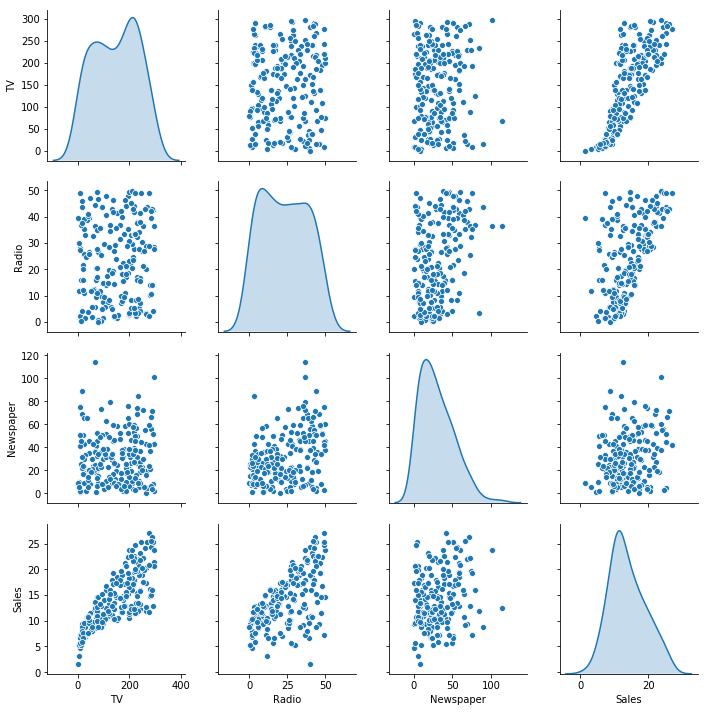

In [8]:
sns.pairplot(A,diag_kind='kde')

In [24]:
model=smf.ols('Sales~TV+Radio',A).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           4.83e-98
Time:                        11:10:59   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
X=A.drop(['Sales','Newspaper'],axis=1)
Y=A['Sales']

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=2)

In [17]:
xtrain.shape

(140, 2)

In [18]:
xtest.shape

(60, 2)

In [6]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)
sales_pred=LR.predict(xtest)
LR.score(xtest,ytest)

0.8087812892543276

In [7]:
rmse=np.sqrt(np.mean((ytest-sales_pred)**2))
rmse

2.2046957809721808

In [21]:
LR.intercept_

3.2752966321846735

In [22]:
LR.coef_

array([0.04560786, 0.18338343])

In [23]:
xtrain.head()

,TV,Radio
29,248.8,27.1
134,219.8,33.5
95,107.4,14.0
43,293.6,27.7
170,284.3,10.6


In [37]:
#To Sell 50 cars, how much money they should spend on TV Ad?
#Using Bivariate model (TV & Radio), to achieve 50 cars sales target, it is suggested
#to invest 47lacs on TV Ads and 239lacs on Radio Ads is recommended

In [38]:
y=A[['Sales']]
x1=A[['TV']]
x2=A[['Radio']]
x3=A[['Newspaper']]
B1=A[['TV','Radio']]
B2=A[['TV','Newspaper']]
X=A[['TV','Radio','Newspaper']]
M1=LinearRegression()
M2=LinearRegression()
M3=LinearRegression()
M4=LinearRegression()
M5=LinearRegression()

M1.fit(x1,y)
M2.fit(x2,y)
M3.fit(x3,y)
M4.fit(B1,y)
M5.fit(B2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
rmse1=np.sqrt(np.sum((M1.predict(x1)-y)**2)/len(y))
rmse2=np.sqrt(np.sum((M2.predict(x2)-y)**2)/len(y))
rmse3=np.sqrt(np.sum((M3.predict(x3)-y)**2)/len(y))
rmse4=np.sqrt(np.sum((M4.predict(B1)-y)**2)/len(y))
rmse5=np.sqrt(np.sum((M5.predict(B2)-y)**2)/len(y))


In [40]:
[rmse1,rmse2,rmse3,rmse4,rmse5]

[Sales    3.242322
 dtype: float64, Sales    4.253516
 dtype: float64, Sales    5.066954
 dtype: float64, Sales    1.668703
 dtype: float64, Sales    3.097226
 dtype: float64]

In [44]:
A.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
A.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
new_col=A['TV']*A['Radio']
B=pd.concat([A,new_col],axis=1)
B.head()

,TV,Radio,Newspaper,Sales,0
1,230.1,37.8,69.2,22.1,8697.78
2,44.5,39.3,45.1,10.4,1748.85
3,17.2,45.9,69.3,9.3,789.48
4,151.5,41.3,58.5,18.5,6256.95
5,180.8,10.8,58.4,12.9,1952.64


In [10]:
B.columns=['TV','Radio','News_Paper','Sales','TV:Radio']

In [11]:
B.head()

,TV,Radio,News_Paper,Sales,TV:Radio
1,230.1,37.8,69.2,22.1,8697.78
2,44.5,39.3,45.1,10.4,1748.85
3,17.2,45.9,69.3,9.3,789.48
4,151.5,41.3,58.5,18.5,6256.95
5,180.8,10.8,58.4,12.9,1952.64


In [17]:
x=B.drop(['Sales','News_Paper'],axis=1)
y=B['Sales']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [20]:
LR2=LinearRegression()
LR2.fit(x_train,y_train)
sales_pred2=LR2.predict(x_test)
rmse2=np.sqrt(np.mean((y_test-sales_pred2)**2))
rmse2

1.2175381742396572

In [21]:
LR2.intercept_

6.457906106595322

In [22]:
LR2.coef_

array([0.02174266, 0.04821437, 0.00095464])

In [27]:
6.457906106595322+0.02174266*9+0.04821437*(41)+0.00095464*(9*41)

8.982641376595323

In [28]:
6.457906106595322+0.02174266*10+0.04821437*(40)+0.00095464*(10*40)

8.985763506595323

In [13]:
m1=smf.ols('Sales~TV',A).fit()
m2=smf.ols('Sales~Radio',A).fit()
m3=smf.ols('Sales~Newspaper',A).fit()
m4=smf.ols('Sales~TV+Radio',A).fit()
m5=smf.ols('Sales~TV+Newspaper',A).fit()
m6=smf.ols('Sales~Radio+Newspaper',A).fit()
m7=smf.ols('Sales~TV+Radio+Newspaper',A).fit()
m8=smf.ols('Sales~TV+Radio+TV:Radio',B).fit()


In [18]:
m1.params[1]

0.047536640433019764

In [14]:
m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          6.68e-146
Time:                        05:23:06   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           4.35e-19
Time:                        07:23:02   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           4.83e-98
Time:                        07:28:07   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
m8.params

Intercept    6.750220
TV           0.019101
Radio        0.028860
TV:Radio     0.001086
dtype: float64

In [56]:
y8_predict=m8.params[0]+m8.params[1]*B['TV']+m8.params[2]*B['Radio']+m8.params[3]*B['TV:Radio']

In [57]:
y8_predict

1      21.686390
2      10.634546
3       9.261214
4      17.634108
5      12.636919
6       8.789898
7      10.844280
8      12.171527
9       6.994718
10     11.206064
11      8.596731
12     17.142359
13      9.125460
14      9.637006
15     18.893947
16     21.985969
17     11.797676
18     25.375420
19     10.204953
20     14.078542
21     18.294271
22     12.747465
23      7.689267
24     15.790725
25      9.156734
26     12.872642
27     14.874492
28     16.174841
29     19.610351
30      9.787826
         ...    
171     8.670221
172    14.230951
173     8.132730
174    11.470806
175    11.917988
176    28.162162
177    20.517045
178    11.668721
179    12.793322
180    12.001197
181    10.258862
182    12.361606
183     8.336252
184    26.921146
185    18.086323
186    22.012728
187     9.793715
188    17.187683
189    16.933537
190     7.702462
191    10.454742
192     9.389971
193     7.273706
194    18.759961
195    16.427357
196     7.740230
197     9.192461
198    12.1879

In [55]:
pd.DataFrame(y7_predict).describe()

,0
count,200.000000
mean,14.022500
std,5.132743
min,6.994718
25%,9.784510
50%,12.741127
75%,17.298177
max,28.162162


In [14]:
x=A[['TV','Radio']]
y=A['Sales']
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
model.intercept_

2.9210999124051362

In [51]:
model.coef_

array([0.04575482, 0.18799423])

In [52]:
model.score(x,y)

0.8971942610828956

In [54]:
y_predict=model.predict(x)
rmse=np.sqrt(np.sum((y-y_predict)**2)/len(y))
rmse

1.668703059366193

In [15]:
new_col=x['TV']*x['Radio']

In [16]:
A=pd.concat([A,new_col],axis=1)

In [89]:
A.head()

,TV,Radio,Newspaper,Sales,0
1,230.1,37.8,69.2,22.1,8697.78
2,44.5,39.3,45.1,10.4,1748.85
3,17.2,45.9,69.3,9.3,789.48
4,151.5,41.3,58.5,18.5,6256.95
5,180.8,10.8,58.4,12.9,1952.64


In [17]:
A.columns=['TV','Radio','Newspaper','Sales','TVRadio']

In [18]:
A.head()

,TV,Radio,Newspaper,Sales,TVRadio
1,230.1,37.8,69.2,22.1,8697.78
2,44.5,39.3,45.1,10.4,1748.85
3,17.2,45.9,69.3,9.3,789.48
4,151.5,41.3,58.5,18.5,6256.95
5,180.8,10.8,58.4,12.9,1952.64


In [19]:
X=A[['TV','Radio','TVRadio']]
y=A[['Sales']]

In [20]:
model2=LinearRegression() #LR model with TV:Radio Interaction Term
model2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
model2.score(X,y)

0.9677905498482523

In [22]:
np.sqrt(np.sum((model2.predict(X)-y)**2)/len(y))

Sales    0.934033
dtype: float64

In [23]:
model2.coef_

array([[0.01910107, 0.02886034, 0.00108649]])

In [24]:
model2.intercept_

array([6.7502202])

In [20]:
y2_predict=model2.predict(X)
rmse2=np.sqrt(np.sum((y-y2_predict)**2)/len(y))
rmse2

Sales    0.934033
dtype: float64

In [52]:
model2=smf.ols('Sales~TV+Radio',A).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           4.83e-98
Time:                        05:02:53   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
Y2=smf.ols('Sales~TV+Radio+TVRadio',A).fit()

In [26]:
Y2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 11 Dec 2018   Prob (F-statistic):          6.68e-146
Time:                        08:04:00   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TVRadio        0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""